In [1]:
%matplotlib inline
import glob
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import os
import time
from lmfit import Parameter, Parameters, Minimizer
from lsst.obs.lsst import LsstCamMapper as camMapper
from lsst.obs.lsst.cameraTransforms import LsstCameraTransforms

from itertools import product

from mixcoatl.gridFitTask import GridFitTask, DistortedGrid
from mixcoatl.sourcegrid import coordinate_distances, fit_error

import warnings
warnings.simplefilter('error', RuntimeWarning)

camera = camMapper._makeCamera()
lct = LsstCameraTransforms(camera)

## Test Partial Fit (Example 1)

2010.1444287631398 -74.21484258461642 -0.051199137592910594
[[ 4.59513515e-06 -3.51688987e-03 -1.82980861e-03]
 [-3.51688987e-03  1.26564702e+01  1.31581858e+00]
 [-1.82980861e-03  1.31581858e+00  5.64984398e+00]]


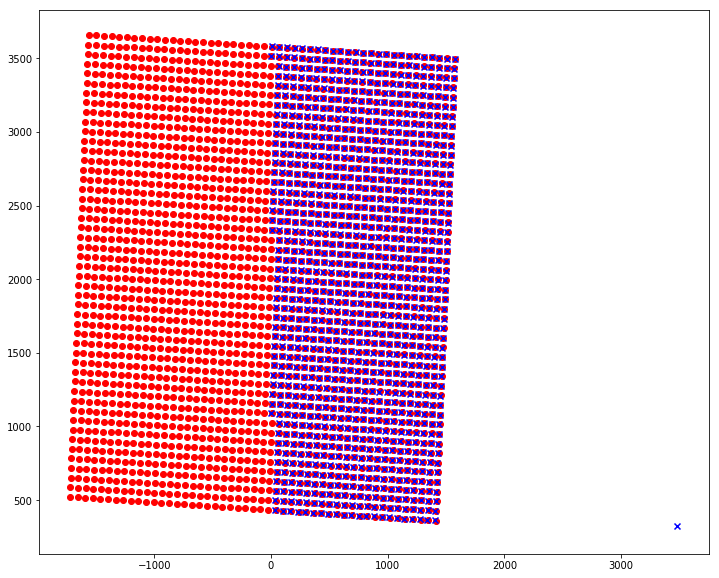

In [2]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/*.cat')
infile0 = infiles[0]

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (2000., -80))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-41.4_-233.1_017/R20_S02_source_catalog.cat
2011.7353774737744 4161.706231403611 -0.05486848581944117
[[2.72949320e-10 2.23774188e-07 6.33595325e-08]
 [2.23774188e-07 3.86427364e-04 3.09213754e-05]
 [6.33595325e-08 3.09213754e-05 3.38268020e-04]]


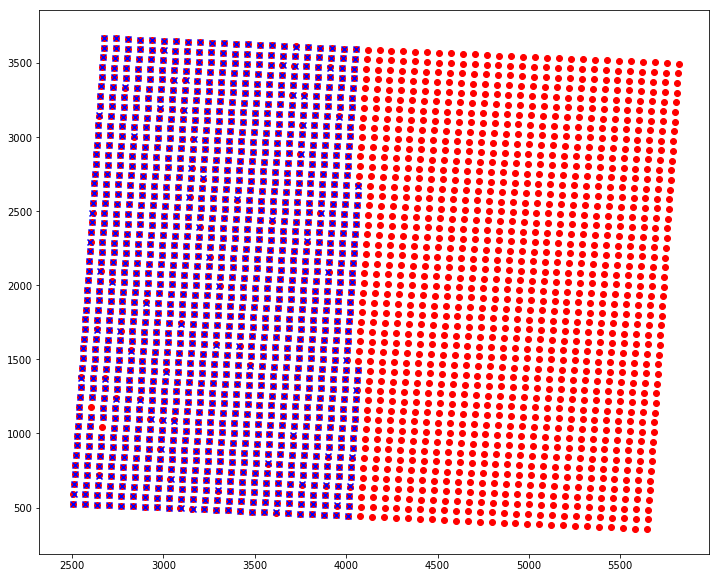

In [3]:
infile1 = infiles[1]
print(infile1)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (2020, 4170))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Test Partial Fit (Example 2)

4118.650769031541 2064.9772188215456 -0.05486208082834332
[[ 1.62519379e-06 -9.46041643e-04 -6.94810767e-04]
 [-9.46041643e-04  1.21945564e+00  1.82373502e-01]
 [-6.94810767e-04  1.82373502e-01  1.10511260e+00]]


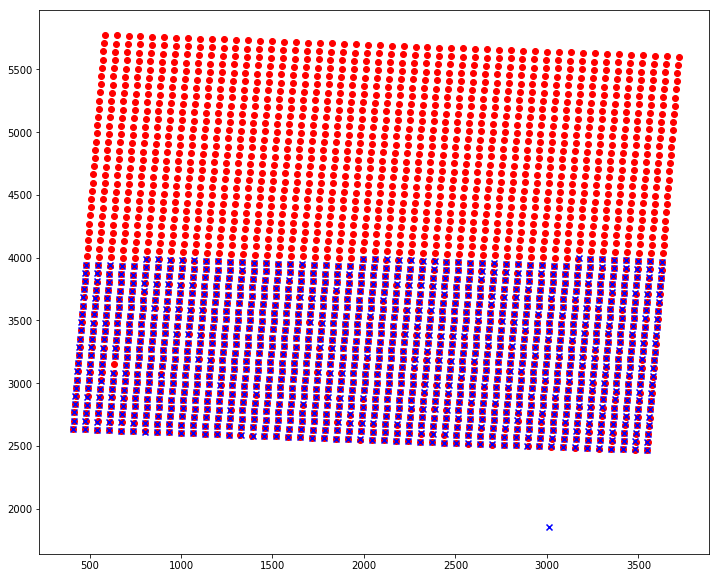

In [4]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/*.cat')
infile0 = infiles[0]

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4100, 2050))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-20.4_-212.1_009/R20_S12_source_catalog.cat
-106.21625787841059 2058.4146231201075 -0.05514474069603802
[[1.00846729e-06 4.30333012e-04 8.30767796e-04]
 [4.30333012e-04 1.21664857e+00 4.65783312e-01]
 [8.30767796e-04 4.65783312e-01 1.79340593e+00]]


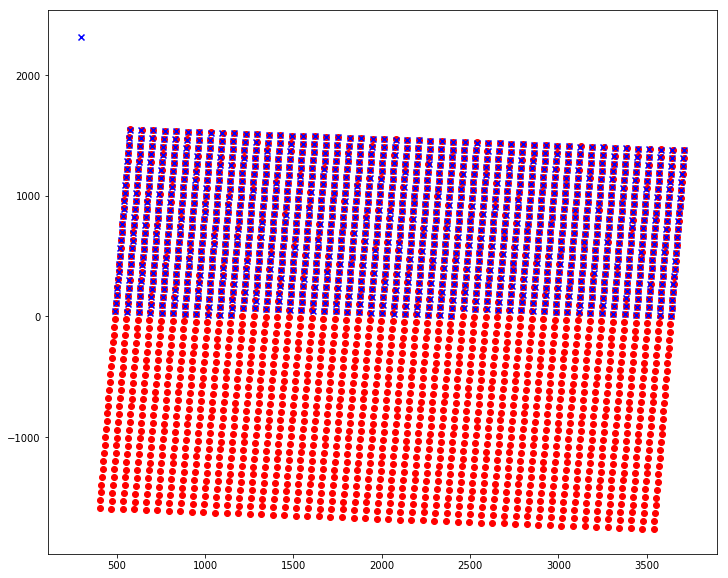

In [5]:
infile1 = infiles[1]
print(infile1)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (-100, 2050))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Test Partial Fit (Example 3)

4045.7767602147164 2069.388476844102 -0.05526888510327473
[[ 9.89513239e-07 -4.41807001e-04 -3.72139705e-04]
 [-4.41807001e-04  8.32265223e-01  6.09433174e-03]
 [-3.72139705e-04  6.09433174e-03  7.79053316e-01]]


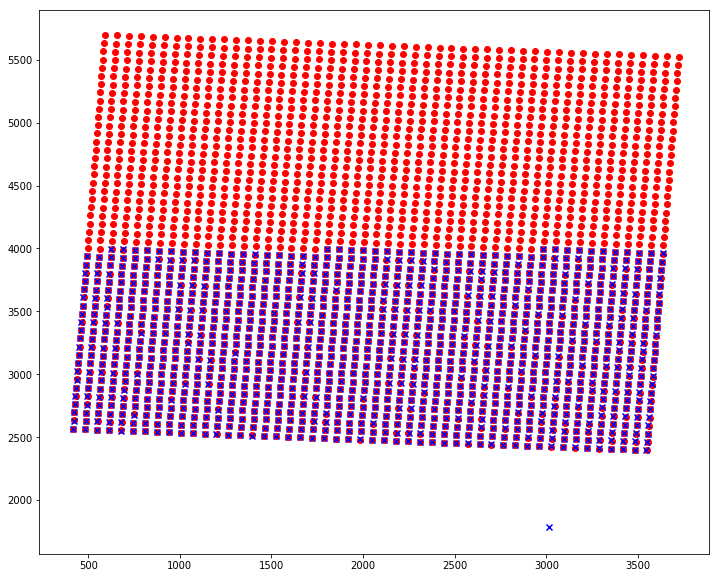

In [10]:
infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-64.0_41.8_000/*.cat')
infile0 = infiles[0]

src0 = fits.getdata(infile0)
all_src0Y = src0['base_SdssCentroid_Y']
all_src0X = src0['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src0['base_SdssShape_XX'] > 4.5)*(src0['base_SdssShape_XX'] <7.) \
    * (src0['base_SdssShape_YY'] > 4.5)*(src0['base_SdssShape_YY'] <7.)

src0Y = all_src0Y[mask]
src0X = all_src0X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid0, result0 = gridfit_task.run(infile0, (4050, 2050))
print(grid0.y0, grid0.x0, grid0.theta)
g0Y, g0X = grid0.get_source_centroids(distorted=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g0X, g0Y, color='red', marker='o')
ax.scatter(src0X, src0Y, color='blue', marker='x')

print(result0.covar)

/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6871D_spacing/spacing_-64.0_41.8_000/R22_S02_source_catalog.cat
-201.4106655908018 2066.37910209184 -0.05710720637475879
[[1.16555890e-06 4.97645839e-04 1.05140455e-03]
 [4.97645839e-04 1.38877627e+00 5.61751582e-01]
 [1.05140455e-03 5.61751582e-01 2.22180225e+00]]


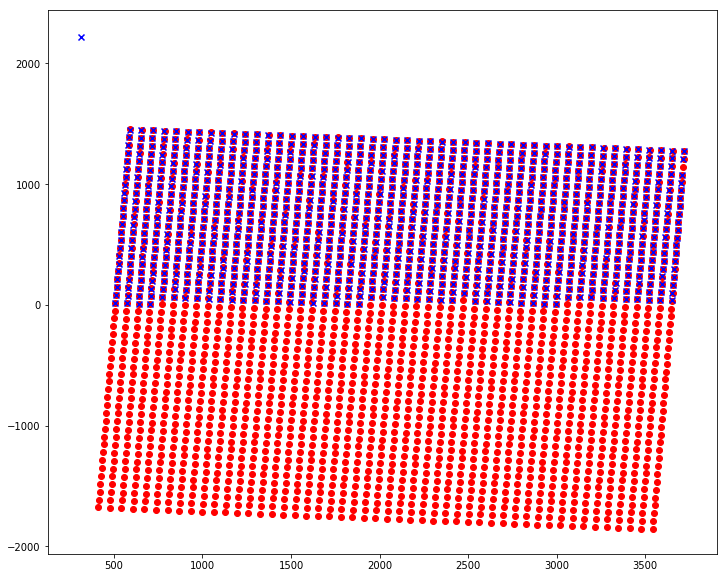

In [12]:
infile1 = infiles[1]
print(infile1)

src1 = fits.getdata(infile1)
all_src1Y = src1['base_SdssCentroid_Y']
all_src1X = src1['base_SdssCentroid_X']

## Curate data here (remove bad shapes, fluxes, etc.)
mask = (src1['base_SdssShape_XX'] > 4.5)*(src1['base_SdssShape_XX'] <7.) \
    * (src1['base_SdssShape_YY'] > 4.5)*(src1['base_SdssShape_YY'] <7.)

src1Y = all_src1Y[mask]
src1X = all_src1X[mask]

gridfit_task = GridFitTask()
gridfit_task.config.brute_search = True
gridfit_task.config.vary_theta = True
gridfit_task.config.outfile = 'test_gridspacing_distorted_grid.fits'

grid1, result1 = gridfit_task.run(infile1, (-180, 2050))
print(grid1.y0, grid1.x0, grid1.theta)
g1Y, g1X = grid1.get_source_centroids(distorted=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

ax.scatter(g1X, g1Y, color='red')
ax.scatter(src1X, src1Y, color='blue', marker='x')

print(result1.covar)

## Make Optic Distortions

In [ ]:
old_infiles = glob.glob('/nfs/slac/g/ki/ki19/lsst/snyder18/LSST/Data/BOT/6865D_dither/raw_data/*.fits')

xstep = np.zeros(len(old_infiles))
ystep = np.zeros(len(old_infiles))
theta = np.zeros(len(old_infiles))

for i, infile in enumerate(old_infiles):

    with fits.open(infile) as hdul:
        ## Read input file
        hdul = fits.open(infile)
        grid_dy = hdul[1].header['DY']
        grid_dx = hdul[1].header['DX']
        grid_theta = hdul[1].header['THETA']
        
        xstep[i] = grid_dx
        ystep[i] = grid_dy
        theta[i] = grid_theta
        
mean_xstep = np.mean(xstep)
mean_ystep = np.mean(ystep)
mean_theta = np.mean(theta)

print(mean_xstep, mean_ystep, mean_theta)

In [ ]:
## Get old optic distortion file
hdul = fits.open('corrected_grid_pt_average_displacement.fits')

dx = hdul[0].data[:, 0]
dy = hdul[0].data[:, 1]

centroid_shifts = (dy, dx)

optics_grid = DistortedGrid(mean_ystep, mean_xstep, mean_theta, 0, 0, 49, 49)
optics_grid.add_centroid_shifts((dy, dx))
#optics_grid.write_fits('optics_distorted_grid.fits', overwrite=True)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()

ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)

In [ ]:
## Rotate by 45 degrees
optics_grid.theta += np.pi/4

gY, gX = optics_grid.get_source_centroids(distorted=False)
gDY, gDX = optics_grid.get_centroid_shifts()
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.quiver(gX, gY, gDX, gDY)
print(optics_grid.norm_dy)